In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

2024-08-06 16:53:18.441475: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
insurance = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')

In [3]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Create column transformer (this will help us normalize/preprocess our data)
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # get all values between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

# Create X & y
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

# Build our train and test sets (use random state to ensure same split as before)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit column transformer on the training data only (doing so on test data would result in data leakage)
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScalar) and one hot encoding (OneHotEncoder)
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [7]:
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [8]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [17]:
X_train_normal.shape, X_train.shape

NameError: name 'Y_train_normal' is not defined

In [11]:
# Set random seed
tf.random.set_seed(42)

# Build the model (3 layers, 100, 10, 1 units)
insurance_model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile the model
insurance_model_1.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=['mae'])

# Fit the model for 200 epochs (same as insurance_model_2)
history = insurance_model_1.fit(X_train_normal, y_train, epochs=200, verbose=1)

Epoch 1/200
34/34 [==============================] - 1s 2ms/step - loss: 13344.0879 - mae: 13344.0879
Epoch 2/200
34/34 [==============================] - 0s 2ms/step - loss: 13335.6182 - mae: 13335.6182
Epoch 3/200
34/34 [==============================] - 0s 2ms/step - loss: 13314.1025 - mae: 13314.1025
Epoch 4/200
34/34 [==============================] - 0s 2ms/step - loss: 13268.5547 - mae: 13268.5547
Epoch 5/200
34/34 [==============================] - 0s 3ms/step - loss: 13187.5137 - mae: 13187.5137
Epoch 6/200
34/34 [==============================] - 0s 2ms/step - loss: 13059.9844 - mae: 13059.9844
Epoch 7/200
34/34 [==============================] - 0s 2ms/step - loss: 12875.5381 - mae: 12875.5381
Epoch 8/200
34/34 [==============================] - 0s 2ms/step - loss: 12623.9053 - mae: 12623.9053
Epoch 9/200
34/34 [==============================] - 0s 2ms/step - loss: 12294.9883 - mae: 12294.9883
Epoch 10/200
34/34 [==============================] - 0s 2ms/step - loss: 11885.92

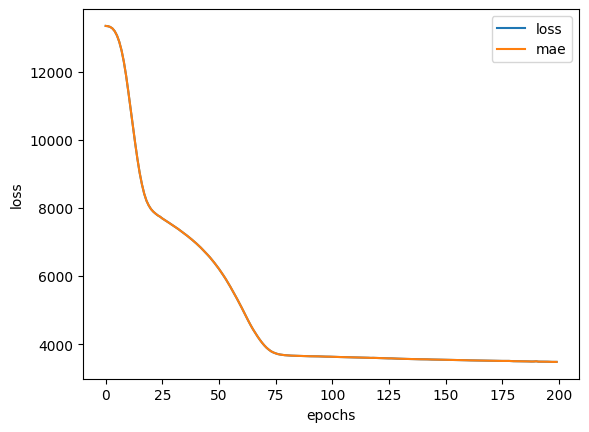

In [12]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

In [14]:
y_preds = insurance_model_1.predict(X_test_normal)

9/9 [==============================] - 0s 2ms/step


In [15]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_preds):
    """
    Plots training data, test data and compares predictions.
    """
    plt.figure(figsize=(10, 7))
    # Plot training data in blue
    plt.scatter(train_data, train_labels, c="b", label="Training data")
    # Plot test data in green
    plt.scatter(test_data, test_labels, c="g", label="Testing data")
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", label="Predictions")
    # Show the legend
    plt.legend();

ValueError: x and y must be the same size

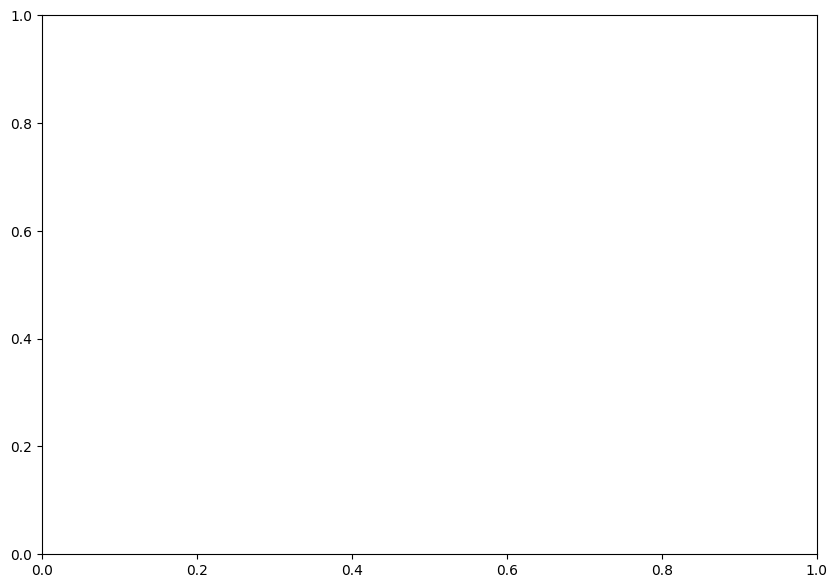

In [18]:
plot_predictions(train_data=X_train, train_labels=y_train, test_data=X_test, test_labels=y_test, predictions=y_preds)

In [19]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1070, 6), (1070,), (268, 6), (268,))